# Convolutional Neural Networks.


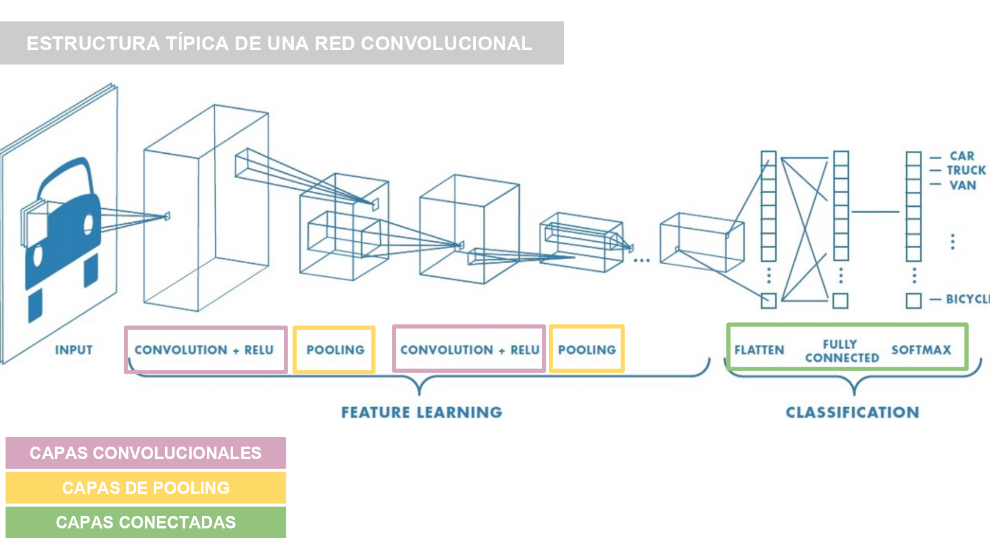

## 1. Designing our first CNN

In this project we will test the effectiveness of convolutional neural networks in evaluating the MNIST dataset.

---

**Task:** Design, train and evaluate with Keras a *Convolutional Neural Network* with the augmented MNIST dataset that we generated in the previous project with the different translation, rotation and noise perturbations (reuse the code). Check if this architecture improves the performance obtained compared to the *Multilayer Neural Network*. To do so, obtain network performance metrics for your ***Augmented test_set*** with the trained network ***without*** and ***with*** augmented data. Are there differences in the results of the experiment?  Similarly, compare the number of parameters used by both networks. Which one uses a smaller number of parameters? (Use the ***model.summary()*** function for this).

**Important:** It is recommended to change the Runtime Environment in the tab *Run Environment* > *Change Runtime Environment Type* the *Hardware Accelerator* from ***None*** to ***GPU***, so that the training performance will be higher.

In [1]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the MNIST dataset
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

X = mnist[:, 1: ]
Y = OneHotEncoder().fit_transform(mnist[:, 0:1]).toarray()

# Scale the X value
X = X / 255.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create preprocessing functions which add a noise factor

def add_noise_25(img):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * 0.25 
    img = np.clip(img + noise, 0., 1.)
    return img

def add_noise_50(img):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * 0.50 
    img = np.clip(img + noise, 0., 1.)
    return img

# Generator of images with 25% noise
n25_datagen = ImageDataGenerator(preprocessing_function=add_noise_25)
# Generator of images with 50% noise
n50_datagen = ImageDataGenerator(preprocessing_function=add_noise_50)
# Generator of rotated images
rot_datagen = ImageDataGenerator(rotation_range=90)
# Generator of translated images
pos_datagen = ImageDataGenerator(width_shift_range  = 0.5, 
                                 height_shift_range = 0.5)

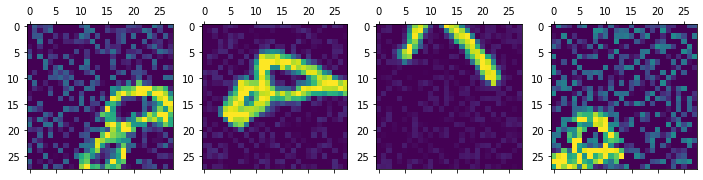

In [3]:
def add_noise(img, f):
    noise = (np.random.rand(28, 28, 1) * 2 - 1) * np.random.rand() * f
    img = np.clip(img + noise, 0., 1.)
    return img

pert_datagen = ImageDataGenerator(width_shift_range  = 0.5, 
                                  height_shift_range = 0.5,
                                  rotation_range=90,
                                  preprocessing_function=lambda img: add_noise(img, 0.5))

fig, axs = plt.subplots(1, 4, figsize=(12,12))
for i in range(4):
  axs[i].matshow(next(pert_datagen.flow(X_train.reshape(-1, 28, 28, 1)))[0,:,:,0])
plt.show()

In [4]:
# Import Keras API
import tensorflow as tf

from keras.optimizer_v1 import SGD
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, ReLU

# Start the construction of the Keras Sequential Model
model = Sequential()

model.add(Input((28, 28, 1)))

# First convolutional layer with ReLU-activation and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=8, padding='same'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=3))

# Second convolutional ayer with ReLU-activation and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=3))

# Third convolutional ayer with ReLU-activation and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=3))

# Flatten the three-dimensional output of the convolutional layers to vectors 
# that can be processed by the dense layers.

model.add(Flatten())

# First fully conected layer with ReLU-activation
model.add(Dense(16, activation='relu'))

# Last fully conected layer with softmax to use classification
model.add(Dense(10, activation='softmax'))


model.compile(optimizer = tf.keras.optimizers.SGD(0.05),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit_generator(pert_datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train), 
                    validation_data=(pert_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)), 
                    epochs=50)

print('\nPosition perturbation:', model.evaluate(pos_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('\nRotation perturbation:', model.evaluate(rot_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('\n25% noise perturbation:', model.evaluate(n25_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('\n50% noise perturbation:', model.evaluate(n50_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


469/469 [==============================] - 21s 25ms/step - loss: 2.2977 - acc: 0.1269 - val_loss: 2.2869 - val_acc: 0.1570
Epoch 2/50
469/469 [==============================] - 11s 24ms/step - loss: 2.2495 - acc: 0.1669 - val_loss: 2.2129 - val_acc: 0.1798
Epoch 3/50
469/469 [==============================] - 11s 24ms/step - loss: 2.1210 - acc: 0.2229 - val_loss: 2.1301 - val_acc: 0.2066
Epoch 4/50
469/469 [==============================] - 11s 24ms/step - loss: 1.9354 - acc: 0.2980 - val_loss: 1.8104 - val_acc: 0.3562
Epoch 5/50
469/469 [==============================] - 12s 25ms/step - loss: 1.7525 - acc: 0.3717 - val_loss: 1.8460 - val_acc: 0.3366
Epoch 6/50
469/469 [==============================] - 13s 27ms/step - loss: 1.6037 - acc: 0.4319 - val_loss: 1.5367 - val_acc: 0.4608
Epoch 7/50
469/469 [==============================] - 11s 24ms/step - loss: 1.4793 - acc: 0.4823 - val_loss: 1.4485 - val_acc: 0.4898
Epoch 8/50
469/469 [==============================] - 11s 24ms/step - los

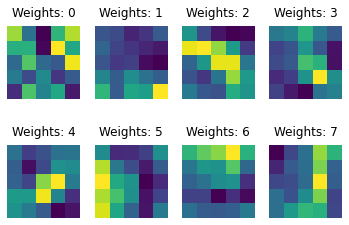

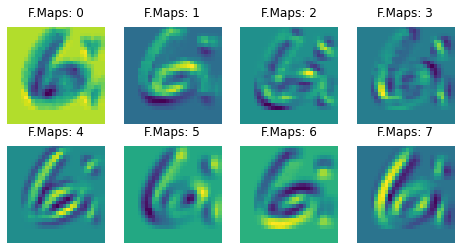

In [5]:
# Visualization of the filters
fig, axs = plt.subplots(2, 4, figsize=(6,4))

for i in range(model.weights[0].shape[3]):
  fig.axes[i].matshow(model.weights[0][:,:,0,i])
  fig.axes[i].set_title('Weights: ' + str(i))
  fig.axes[i].axis('off')

plt.show()

# Visualization of the feature maps

fmaps = model.layers[0](X_test.reshape(-1, 28, 28, 1)[0:1, ...])

fig, axs = plt.subplots(2, 4, figsize=(8,4))

for i in range(model.weights[0].shape[3]):
  fig.axes[i].matshow(fmaps[0,:,:,i])
  fig.axes[i].set_title('F.Maps: ' + str(i))
  fig.axes[i].axis('off')

plt.show()

In [6]:
# Seeing the progression of the validation loss in the previous training
# It looks we can keep training the model for some epoch more
model.compile(optimizer=tf.keras.optimizers.SGD(0.005),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit_generator(pert_datagen.flow(X_train.reshape(-1, 28, 28, 1), Y_train), 
                    validation_data=(pert_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)), 
                    epochs=50)

print('\nPosition perturbation:', model.evaluate(pos_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('\nRotation perturbation:', model.evaluate(rot_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('\n25% noise perturbation:', model.evaluate(n25_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))
print('\n50% noise perturbation:', model.evaluate(n50_datagen.flow(X_test.reshape(-1, 28, 28, 1), Y_test)))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


469/469 [==============================] - 12s 25ms/step - loss: 0.8013 - acc: 0.7270 - val_loss: 0.8157 - val_acc: 0.7230
Epoch 2/50
469/469 [==============================] - 11s 24ms/step - loss: 0.7741 - acc: 0.7368 - val_loss: 0.7885 - val_acc: 0.7284
Epoch 3/50
469/469 [==============================] - 11s 24ms/step - loss: 0.7785 - acc: 0.7333 - val_loss: 0.7974 - val_acc: 0.7224
Epoch 4/50
469/469 [==============================] - 11s 24ms/step - loss: 0.7780 - acc: 0.7363 - val_loss: 0.7792 - val_acc: 0.7332
Epoch 5/50
469/469 [==============================] - 11s 24ms/step - loss: 0.7621 - acc: 0.7409 - val_loss: 0.7839 - val_acc: 0.7368
Epoch 6/50
469/469 [==============================] - 11s 24ms/step - loss: 0.7657 - acc: 0.7369 - val_loss: 0.7766 - val_acc: 0.7402
Epoch 7/50
469/469 [==============================] - 11s 24ms/step - loss: 0.7740 - acc: 0.7340 - val_loss: 0.7871 - val_acc: 0.7328
Epoch 8/50
469/469 [==============================] - 11s 24ms/step - los

## 2. Classifying real images (CIFAR100 - Dataset)

---

<center><img width="300" src=https://vbvsharma.com/assets/images/2019-05-12-CNN-on-CIFAR-10-using-TensorFlow/output_9_0.png></center>

**Task:** Once we have learned how to classify MNIST images with a Convolutional Neural Network (CNN), it will not be difficult to generalize our problem to other more complex datasets. In this exercise we will try to design, train and evaluate a CNN trained on the CIFAR100 dataset, for 100 different object classes of color images.

1. Visualize some images of the dataset and explore some properties of the dataset. Perform also the corresponding preprocessing of the data.

2. Once the exploratory analysis is done, design the neural network, train it and evaluate it.

In [7]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb

import matplotlib.pyplot as plt
import numpy.random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

X_train, X_test = X_train / 255., X_test / 255.
Y_train, Y_test = OneHotEncoder(sparse=False).fit_transform(Y_train), OneHotEncoder(sparse=False).fit_transform(Y_test)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

169017344/169001437 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 100) (10000, 32, 32, 3) (10000, 100)


In [8]:
# Import Keras API
import tensorflow as tf

from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten, ReLU

# Construction of the Keras Sequential Model
model = Sequential()

# First convolutional layer with ReLU-activation and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=8, padding='same'))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=3))

# Second convolutional layer with ReLU-activation and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same'))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=3))

# Third convolutional layer with ReLU-activation and max-pooling
model.add(Conv2D(kernel_size=5, strides=1, filters=32, padding='same'))
model.add(ReLU())

model.add(MaxPooling2D(pool_size=3))

# Flatten the three-dimensional output of the convolutional layers to vectors 
# that can be processed by the dense layers.
model.add(Flatten())

# First fully conected layer with ReLU-activation
model.add(Dense(128, activation='relu'))

# Last fully conected layer with softmax activation to use in classification

model.add(Dense(100, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(0.0005),
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(X_train, 
          Y_train, 
          validation_data=(X_test, Y_test),
          epochs=50,
          batch_size=16)

Epoch 1/50
3125/3125 [==============================] - 18s 5ms/step - loss: 4.0485 - acc: 0.0769 - val_loss: 3.6790 - val_acc: 0.1403
Epoch 2/50
3125/3125 [==============================] - 17s 5ms/step - loss: 3.5509 - acc: 0.1581 - val_loss: 3.4286 - val_acc: 0.1806
Epoch 3/50
3125/3125 [==============================] - 17s 6ms/step - loss: 3.3552 - acc: 0.1930 - val_loss: 3.3414 - val_acc: 0.1953
Epoch 4/50
3125/3125 [==============================] - 17s 6ms/step - loss: 3.2219 - acc: 0.2153 - val_loss: 3.2410 - val_acc: 0.2193
Epoch 5/50
3125/3125 [==============================] - 16s 5ms/step - loss: 3.1189 - acc: 0.2361 - val_loss: 3.1170 - val_acc: 0.2434
Epoch 6/50
3125/3125 [==============================] - 17s 6ms/step - loss: 3.0314 - acc: 0.2524 - val_loss: 3.1260 - val_acc: 0.2396
Epoch 7/50
3125/3125 [==============================] - 17s 6ms/step - loss: 2.9604 - acc: 0.2650 - val_loss: 3.0101 - val_acc: 0.2601
Epoch 8/50
3125/3125 [==============================] -